<a href="https://colab.research.google.com/github/GabrielWalak/Eksploracja-danych/blob/main/Zadanie_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Liczba próbek: 178, Cech: 13
Rozkład klas: [59 71 48]


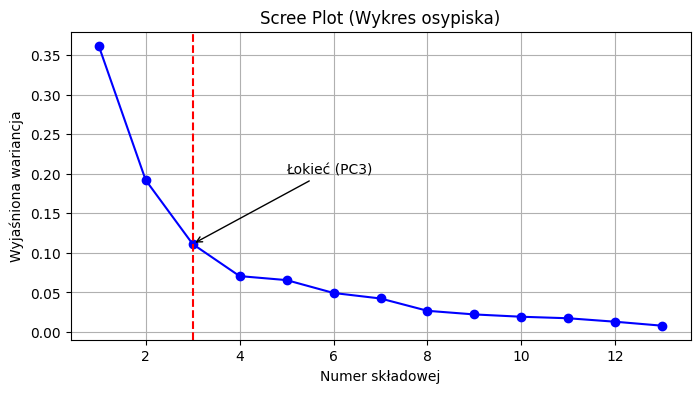

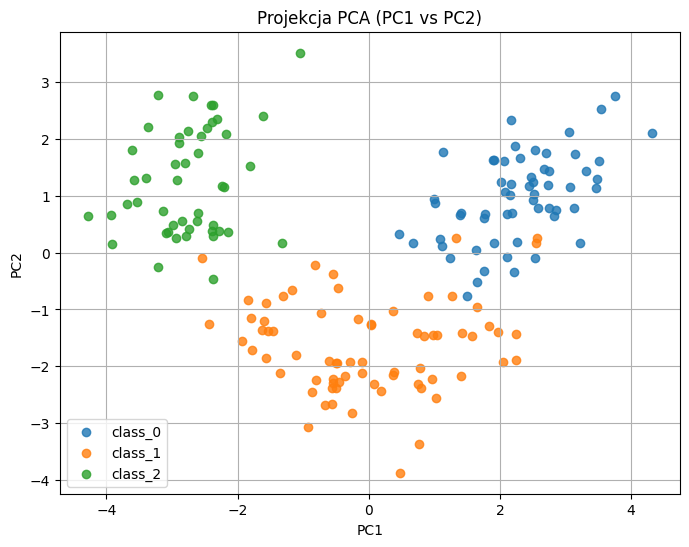

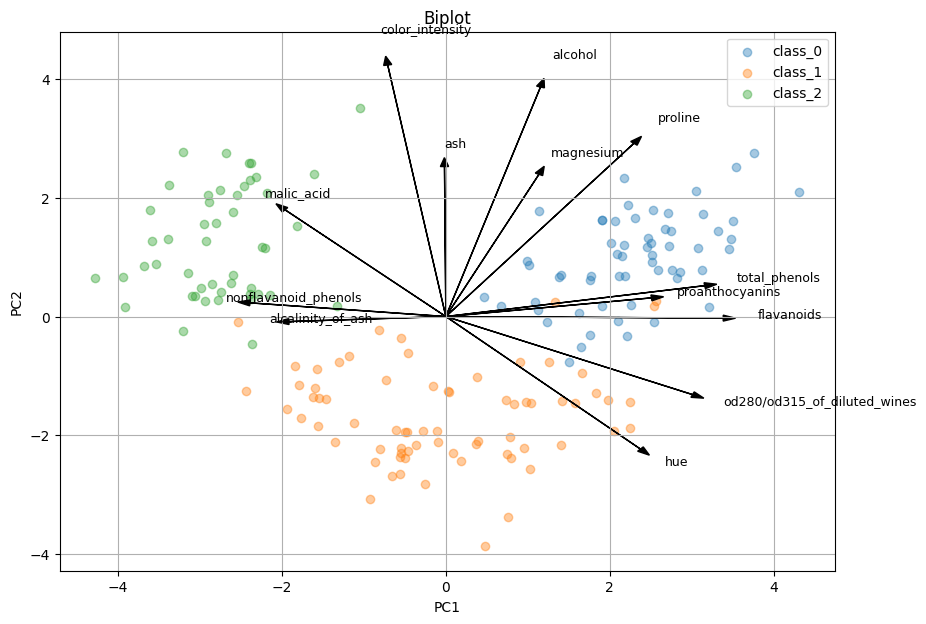


Ładunki dla PC1 i PC2:
                                PC1    PC2
alcohol                       0.144  0.484
malic_acid                   -0.245  0.225
ash                          -0.002  0.316
alcalinity_of_ash            -0.239 -0.011
magnesium                     0.142  0.300
total_phenols                 0.395  0.065
flavanoids                    0.423 -0.003
nonflavanoid_phenols         -0.299  0.029
proanthocyanins               0.313  0.039
color_intensity              -0.089  0.530
hue                           0.297 -0.279
od280/od315_of_diluted_wines  0.376 -0.164
proline                       0.287  0.365


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# --- 1. Przygotowanie danych ---
wine = load_wine()
X, y = wine.data, wine.target
feature_names = wine.feature_names
target_names = wine.target_names

# 1.2 Podstawowe statystyki
print(f"Liczba próbek: {X.shape[0]}, Cech: {X.shape[1]}")
print(f"Rozkład klas: {np.bincount(y)}")

# 1.3 Standaryzacja
# Odp: Konieczna, bo PCA szuka kierunków o największej wariancji. Bez niej cechy o dużych
# wartościach (np. Prolina) zdominowałyby te o małych, fałszując wyniki.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 2. Wykonanie PCA ---
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 2.2 Wariancja
exp_var = pca.explained_variance_ratio_
cum_var = np.cumsum(exp_var)

# 2.3 Ile składowych dla >= 80% wariancji?
# Odp: Potrzeba 5 składowych
n_80 = np.argmax(cum_var >= 0.80) + 1

# --- 3. Wizualizacja ---

# 3.1 Scree Plot

plt.figure(figsize=(8, 4))
plt.plot(range(1, 14), exp_var, 'o-', color='blue')
plt.axvline(x=3, color='red', linestyle='--') # Zaznaczenie łokcia
plt.title('Scree Plot (Wykres osypiska)')
plt.xlabel('Numer składowej'); plt.ylabel('Wyjaśniona wariancja')
plt.annotate('Łokieć (PC3)', xy=(3, exp_var[2]), xytext=(5, 0.2), arrowprops=dict(arrowstyle='->'))
plt.grid(True); plt.show()

# 3.2 Projekcja 2D

plt.figure(figsize=(8, 6))
for i, name in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=name, alpha=0.8)
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title('Projekcja PCA (PC1 vs PC2)')
plt.legend(); plt.grid(True); plt.show()

# 3.3 Biplot

def draw_biplot(score, coeff, labels):
    plt.figure(figsize=(10, 7))
    for i, name in enumerate(target_names):
        plt.scatter(score[y == i, 0], score[y == i, 1], label=name, alpha=0.4)
    for i in range(coeff.shape[0]):
        plt.arrow(0, 0, coeff[i,0]*8, coeff[i,1]*8, color='black', head_width=0.1)
        plt.text(coeff[i,0]*9, coeff[i,1]*9, labels[i], color='black', fontsize=9)
    plt.xlabel("PC1"); plt.ylabel("PC2"); plt.title("Biplot")
    plt.legend(); plt.grid(True); plt.show()

draw_biplot(X_pca[:, 0:2], pca.components_[0:2, :].T, feature_names)

# --- 4. Interpretacja ---
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(13)], index=feature_names)
print("\nŁadunki dla PC1 i PC2:")
print(loadings[['PC1', 'PC2']].round(3))

# ODPOWIEDZI NA PYTANIA 4.2:
# 1. PC1 Dominacja: Flavanoids (0.42), Total Phenols (0.39). Reprezentuje zawartość fenoli.
# 2. PC2 Dominacja: Color intensity (0.53), Alcohol (0.48). Reprezentuje moc i barwę.
# 3. Separowalność 2D: Tak, klasy tworzą wyraźne skupiska (dobra separacja).